In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('Data/spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [5]:
# drop unnecessary columns in place
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns to something better
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# convert label to a numerical variable with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [10]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for empty strings (it's easier to replace empty strings with NaN values)
(data['text'] == ' ').sum()

0

In [13]:
# check for duplicates values show sum of duplicates
data.duplicated().sum()

403

In [14]:
# drop duplicates keeping the first occurrence
data.drop_duplicates(keep='first', inplace=True)

In [15]:
# check for duplicates values show sum of duplicates
data.duplicated().sum()

0

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# check shape of data
data.shape

(5169, 2)

# Exploratory Data Analysis

In [18]:
data.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [19]:
# calculate total number of characters in text
data['num_chars'] = data['text'].apply(len)
data['num_chars'].head()

0    111
1     29
2    155
3     49
4     61
Name: num_chars, dtype: int64

In [20]:
# calculate total number of words in text
data['num_words'] = data['text'].apply(lambda x: len(x.split()))
data['num_words'].head()

0    20
1     6
2    28
3    11
4    13
Name: num_words, dtype: int64

In [21]:
# calculate total number of sentences in text
data['num_sentences'] = data['text'].apply(lambda x: len(x.split('.')))
data['num_sentences'].head()

0    9
1    7
2    2
3    7
4    1
Name: num_sentences, dtype: int64

In [22]:
data.head(2)

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7


In [23]:
# descriptive num_chars, num_words, num_sentences
data[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [24]:
# show description for ham messages for num_chars, num_words, num_sentences
data[data['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [25]:
# show description for spam messages for num_chars, num_words, num_sentences
data[data['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


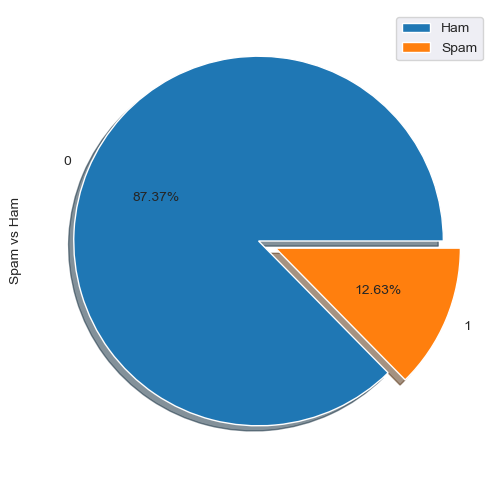

In [26]:
# draw a pie chart for ham and spam
data['target'].value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(6, 6), autopct='%1.2f%%', shadow=True)
plt.ylabel('Spam vs Ham')
plt.legend(['Ham', 'Spam'])
plt.show()

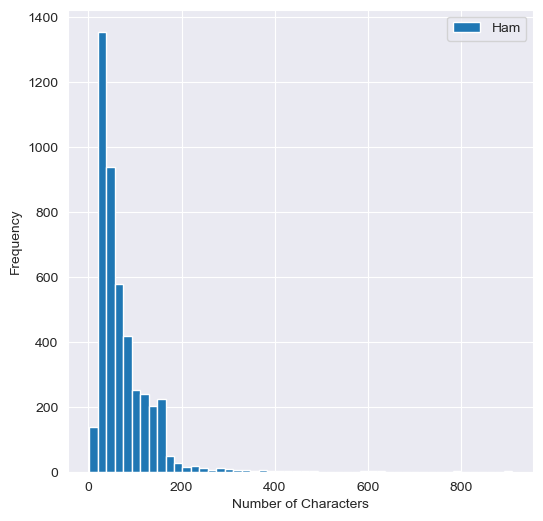

In [27]:
# draw a histogram for num_chars for ham messages
data[data['target'] == 0]['num_chars'].plot(kind='hist', bins=50, figsize=(6, 6))
plt.xlabel('Number of Characters')
plt.legend(['Ham'])
plt.show()

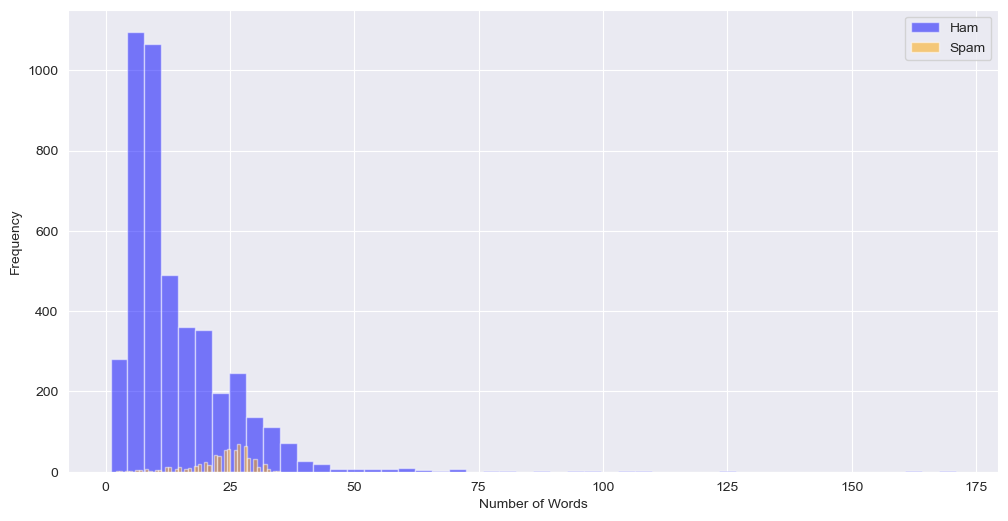

In [28]:
# Create separate data subsets for 'Ham' and 'Spam'
ham_data = data[data['target'] == 0]
spam_data = data[data['target'] == 1]

# Create histograms with different colors
plt.figure(figsize=(12, 6))

# Plot histogram for 'Ham' with blue color
ham_data['num_words'].plot(kind='hist', bins=50, alpha=0.5, color='blue', label='Ham')

# Plot histogram for 'Spam' with orange color
spam_data['num_words'].plot(kind='hist', bins=50, alpha=0.5, color='orange', label='Spam')

plt.xlabel('Number of Words')
plt.legend()
plt.show()

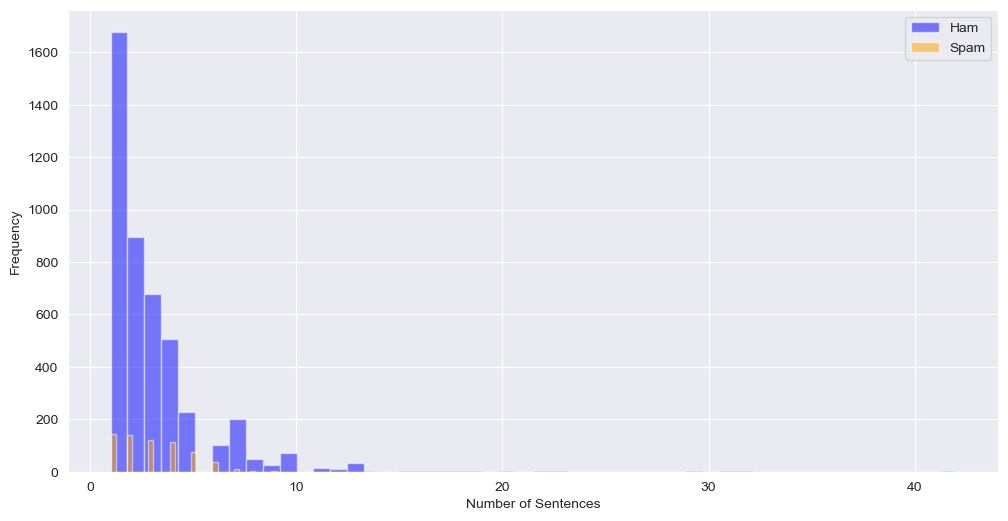

In [29]:
# create a histogram for ham and spam messages for num_sentences
plt.figure(figsize=(12, 6))
ham_data['num_sentences'].plot(kind='hist', bins=50, alpha=0.5, color='blue', label='Ham')
spam_data['num_sentences'].plot(kind='hist', bins=50, alpha=0.5, color='orange', label='Spam')
plt.xlabel('Number of Sentences')
plt.legend()

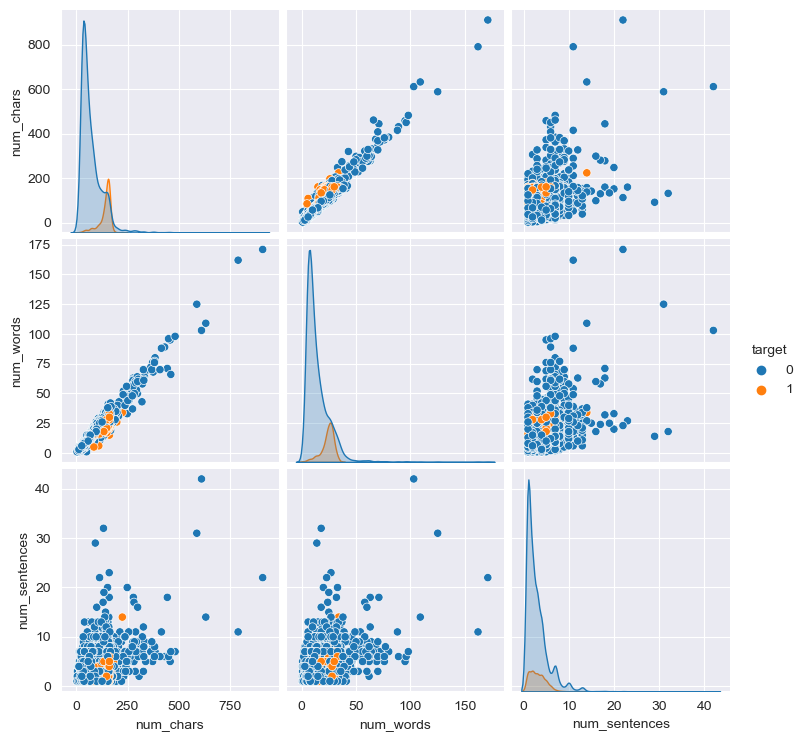

In [30]:
sns.pairplot(data[['num_chars', 'num_words', 'num_sentences', 'target']], hue='target')

<Axes: >

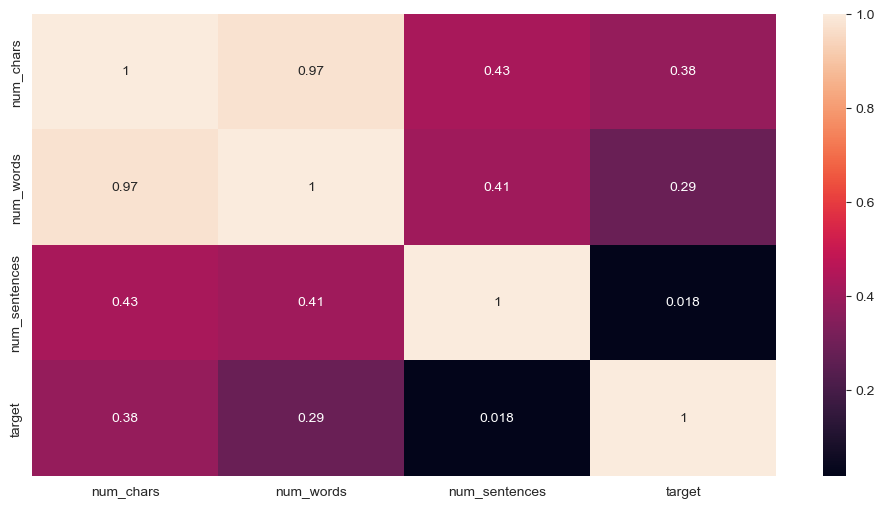

In [31]:
# correlation matrix on heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data[['num_chars', 'num_words', 'num_sentences', 'target']].corr(), annot=True)

# Data Preprocessing
lower case
tokenize
remove special characters
remove stop words and punctuation
stemming

In [32]:
# import libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [33]:
def transform_text(text):
    text = text.lower() # lower case
    text = nltk.word_tokenize(text) # tokenization
    y = []
    for i in text:
        if i.isalnum(): # remove special characters
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in  string.punctuation: # remove stop words
            y.append(i)
    text = y[:]
    y.clear()
    ss = SnowballStemmer('english')
    for i in text:
        y.append(ss.stem(i)) # stemming
    return " ".join(y)

In [34]:
data['text_processed'] = data['text'].apply(transform_text)

In [35]:
data.head(2)

,target,text,num_chars,num_words,num_sentences,text_processed
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni


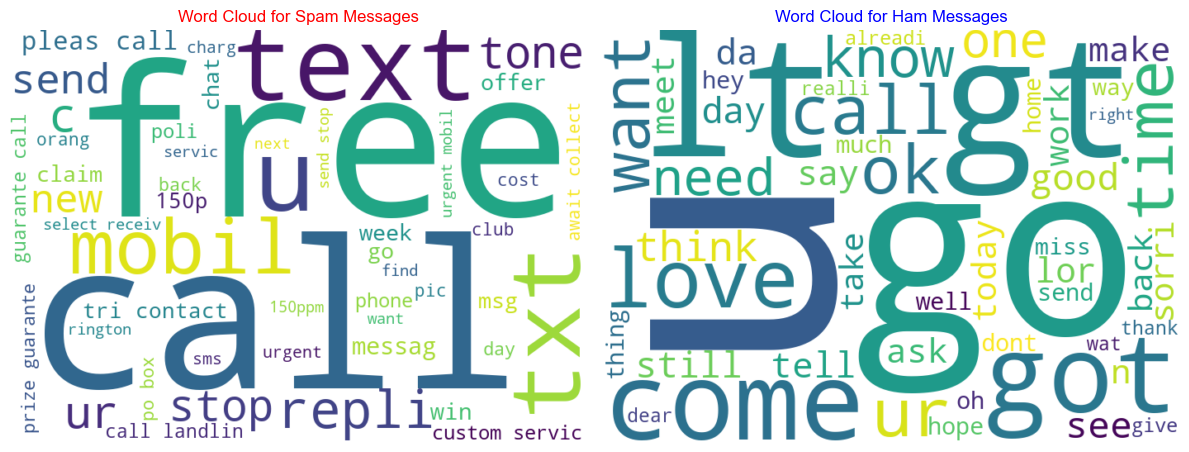

In [36]:
# create a word cloud for spam messages and ham messages
# Assuming 'data' is your DataFrame

spam_data = data[data['target'] == 1]['text_processed']
ham_data = data[data['target'] == 0]['text_processed']

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for the spam word cloud
plt.subplot(1, 2, 1)
spam_cloud = WordCloud(width=700, height=500, background_color='white', max_words=50).generate(' '.join(spam_data))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', color='red')  # Set header color
plt.axis('off')

# Create the second subplot for the ham word cloud
plt.subplot(1, 2, 2)
ham_cloud = WordCloud(width=700, height=500, background_color='white', max_words=50).generate(' '.join(ham_data))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', color='blue')  # Set header color
plt.axis('off')

plt.tight_layout()
plt.show()

In [37]:
# textprocessing column to 30 most common words in spam messages
spam_words = []
for msg in data[data['target'] == 1]['text_processed']:
    for word in msg.split():
        spam_words.append(word)

In [38]:
# create a Counter for spam_words
from collections import Counter
spam_word_counter = Counter(spam_words)
print(spam_word_counter.most_common(30))

[('call', 320), ('free', 191), ('2', 155), ('txt', 130), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('week', 69), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57), ('contact', 56), ('award', 55), ('phone', 52), ('cash', 51), ('pleas', 51), ('win', 48), ('c', 45), ('collect', 45), ('min', 45)]


In [39]:
# textprocessing column to 30 most common words in ham messages
ham_words = []
for msg in data[data['target'] == 0]['text_processed']:
    for word in msg.split():
        ham_words.append(word)

In [40]:
# create a Counter for ham_words
from collections import Counter
ham_word_counter = Counter(ham_words)
print(ham_word_counter.most_common(30))

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 217), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165), ('lor', 159), ('4', 156), ('home', 152), ('think', 149), ('see', 147), ('take', 143), ('still', 143), ('da', 141), ('tell', 133), ('make', 129)]


C:\Users\Shakil\AppData\Local\Temp\ipykernel_13460\2433904852.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20c')


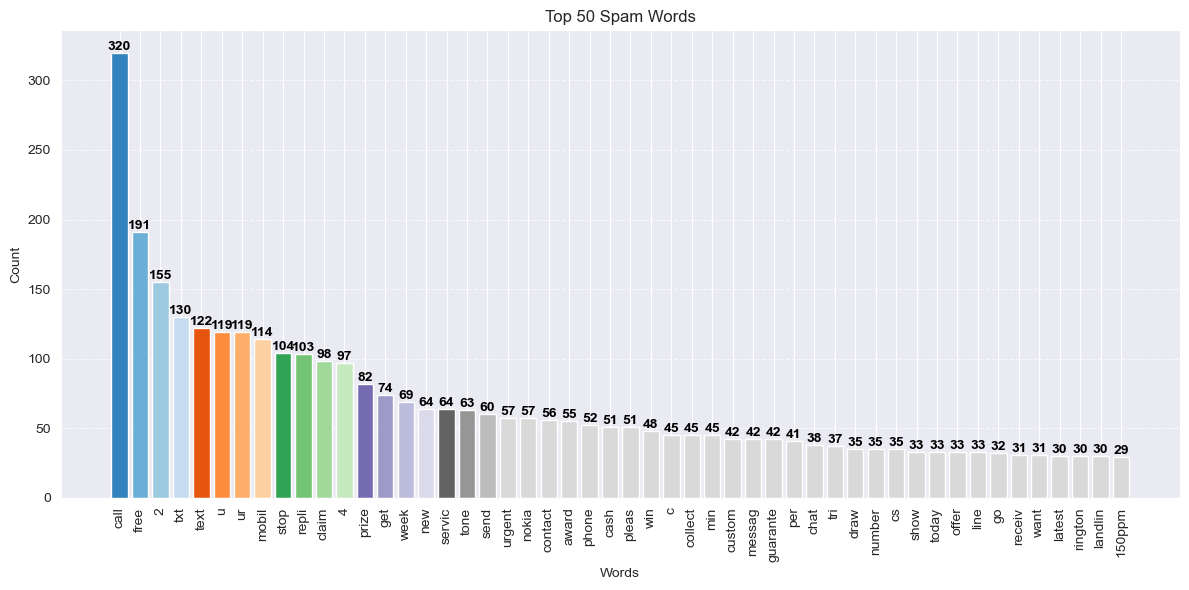

In [41]:
# Choose a color palette for the bars
color_palette = plt.cm.get_cmap('tab20c')

plt.figure(figsize=(12, 6))
top_words, word_counts = zip(*spam_word_counter.most_common(50))

# Create a bar plot with custom colors from the chosen color palette
bars = plt.bar(top_words, word_counts, color=color_palette(range(len(top_words))))

# Adding text annotations on top of the bars
for bar, count in zip(bars, word_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 50 Spam Words')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\Shakil\AppData\Local\Temp\ipykernel_13460\4018445016.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('Pastel1')


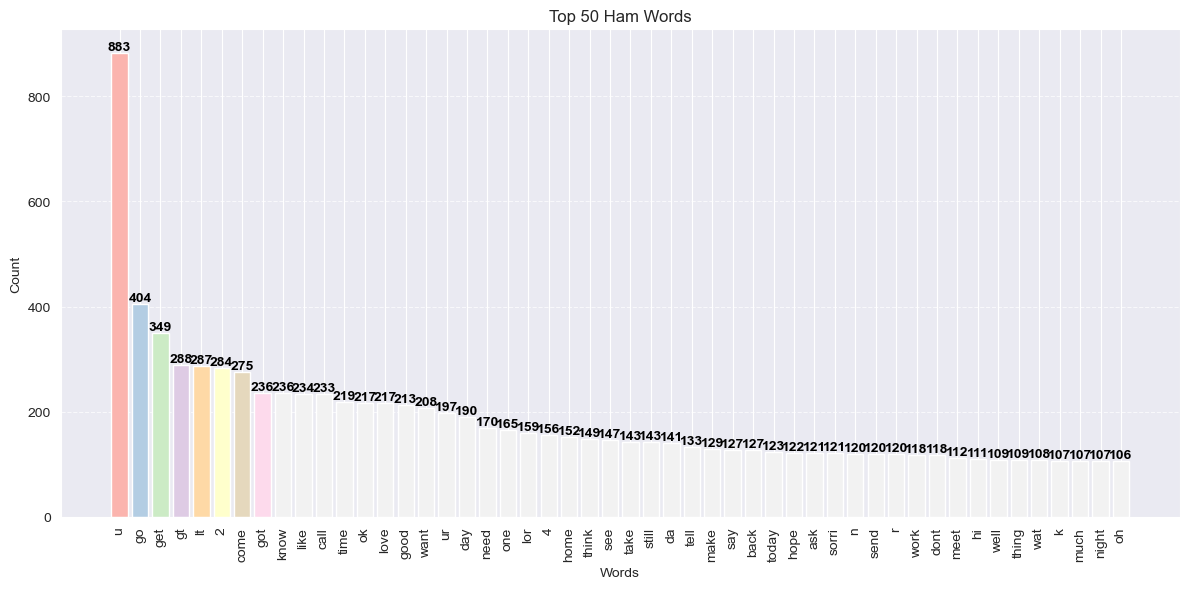

In [42]:
# create a histogram for top 50 ham_words
# Choose a color palette for the bars
color_palette = plt.cm.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))
top_words, word_counts = zip(*ham_word_counter.most_common(50))

# Create a bar plot with custom colors from the chosen color palette
bars = plt.bar(top_words, word_counts, color=color_palette(range(len(top_words))))

# Adding text annotations on top of the bars
for bar, count in zip(bars, word_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 50 Ham Words')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Model Building

In [43]:
data.head(2)

,target,text,num_chars,num_words,num_sentences,text_processed
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok lar joke wif u oni


In [44]:
# remove num_chars, num_words, num_sentences columns
data.drop(['num_chars', 'num_words', 'num_sentences'], axis=1, inplace=True)

In [45]:
# vertorize text_processed column using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(data['text_processed'])

In [46]:
X.shape

(5169, 4000)

In [47]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=42)

In [49]:
# shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3876, 4000), (1293, 4000), (3876,), (1293,))

In [50]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
# instantiate MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.8646558391337974
Precision Score:  0.4785714285714286
Confusion Matrix: 
 [[984 146]
 [ 29 134]]


In [53]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9659706109822119
Precision Score:  0.983739837398374
Confusion Matrix: 
 [[1128    2]
 [  42  121]]


In [54]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy Score:  0.9767981438515081
Precision Score:  0.9925925925925926
Confusion Matrix: 
 [[1129    1]
 [  29  134]]


# I am going to use MultinomialNB with TF-IDF vectorizer

In [55]:
# make packal for TF-IDF vectorizer and model
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))